在前两章我们分别介绍了线性回归与逻辑回归，其分别符合不同的概率分布：

* 线性回归问题符合正态分布 $y|x;\theta \sim N(\mu,\sigma^2)$

* 逻辑回归问题符合伯努利分布 $y|x;\theta \sim \text{Bernoulli}(\phi)$

实际上这些模型都是一个更为广泛的模型族的特例，这个模型族被称为 **「广义线性模型(GLM-Generalized Linear Model)」**。

### 1 指数分布

为了引出广义线性模型，我们首先需要介绍 **「指数族分布(exponential family distribution)」**：

如果一个分布可以被表示成如下形式，我们就称其属于指数分布族：

$$p(y;\eta)=b(y)exp(\eta^T T(y)-a(\eta)) $$

* $\eta$被称为分布的 **「自然参数(natural parameter)」**（或者称为 **「典范参数(canonical parameter)」**）

* $T(y)$被称为 **「充分统计量(sufficient statistic)」**，通常 $T(y)=y$

* $a(\eta)$被称为 **「对数分割函数(log partition function)」**

* $e^{-a(\eta)}$ 本质上是一个 **「归一化常数(normalization constant)」**，确保概率 $p(y;\eta)$和为1

当选定$T,a,b$时，我们得到了一种以$\eta$为参数的分布。下面我们来证明 **「伯努利分布(Bernoulli distribution)」** 和 **「高斯分布(Gaussian distribution)」** 属于指数族分布。

#### 1.1 伯努利分布的证明

伯努利分布可以表示为：

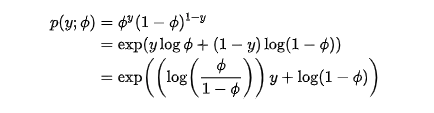

自然参数$\eta=log(\frac{\phi}{1-\phi})$,这里自然参数不是向量，所以他的转置不变。而从该式可以导出$\phi=\frac{1}{1+e^{-\phi}}$,这正是我们熟悉的 sigmoid 函数！之后我们推导逻辑回归是广义线性模型时会再提到这个。

现在，我们可以得到：

$$T(y)=y$$

$$a(\eta)=-log(1-\phi)=log(1+e^{\eta})$$

$$b(y)=1$$

这表明通过设定适当的$T,a,b$ ，伯努利分布可以写成等式 (1) 的形式，即其属于指数族分布。

#### 1.2 正态分布的证明

之前我们推导线性回归时得出了$\sigma$的值对 $\theta$ 的选择没有影响，所以为了简化推导，这里设定$\sigma^2 = 1$，于是我们有：

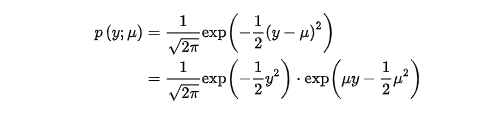

因此，通过如下选择，我们可以证明高斯分布属于指数族分布：

$$\eta = \mu$$

$$T(y)=y$$

$$a(\eta)=\frac{\mu^2}{2}=\eta^2$$

$$b(y)=(1/\sqrt{2 \pi})exp(-y^2 / 2)$$

其实，还有许多其他的分布属于指数族，比如多项式分布、泊松分布、伽马分布等.